# Casos confirmados de Covid-19

In [1]:
import pandas as pd
from urllib.request import urlretrieve 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
#registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#elemina os warnings das bibliotecas 
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

urlretrieve(url, 'C:/Users/rogerio/Desktop/rogerinho/dadosCovid/casosGlobalCovid.csv')

('C:/Users/rogerio/Desktop/rogerinho/dadosCovid/casosGlobalCovid.csv',
 <http.client.HTTPMessage at 0x1c688dd4288>)

In [3]:
df_covid = pd.read_csv('casosGlobalCovid.csv')

In [4]:
df_covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,45723,45844,46116,46274,46516,46718,46837,46837,47072,47306
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,36245,36790,37625,38182,39014,39719,40501,41302,42148,42988
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,80168,81212,82221,83199,84152,85084,85927,86730,87502,88252
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6610,6610,6712,6745,6790,6842,6904,6955,7005,7050
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,15008,15087,15103,15139,15251,15319,15361,15493,15536,15591


In [5]:
df_covid = df_covid.rename(columns = {'Country/Region':'Paises'})
df_covid

,Province/State,Paises,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,45723,45844,46116,46274,46516,46718,46837,46837,47072,47306
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,36245,36790,37625,38182,39014,39719,40501,41302,42148,42988
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,80168,81212,82221,83199,84152,85084,85927,86730,87502,88252
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,6610,6610,6712,6745,6790,6842,6904,6955,7005,7050
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,15008,15087,15103,15139,15251,15319,15361,15493,15536,15591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,80429,81890,83585,85647,88004,90192,92708,94676,96098,98038
267,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
268,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2148,2160,2177,2191,2197,2217,2239,2267,2304,2337
269,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,17569,17589,17608,17647,17665,17700,17730,17857,17898,17916


In [6]:
df_covid.drop(['Lat', 'Long'], axis=1, inplace=True)
df_covid.head()

,Province/State,Paises,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,45723,45844,46116,46274,46516,46718,46837,46837,47072,47306
1,NaN,Albania,0,0,0,0,0,0,0,0,...,36245,36790,37625,38182,39014,39719,40501,41302,42148,42988
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,80168,81212,82221,83199,84152,85084,85927,86730,87502,88252
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,6610,6610,6712,6745,6790,6842,6904,6955,7005,7050
4,NaN,Angola,0,0,0,0,0,0,0,0,...,15008,15087,15103,15139,15251,15319,15361,15493,15536,15591


In [7]:
df_pais = df_covid.groupby('Paises').sum()
df_pais

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20
Paises,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,45723,45844,46116,46274,46516,46718,46837,46837,47072,47306
Albania,0,0,0,0,0,0,0,0,0,0,...,36245,36790,37625,38182,39014,39719,40501,41302,42148,42988
Algeria,0,0,0,0,0,0,0,0,0,0,...,80168,81212,82221,83199,84152,85084,85927,86730,87502,88252
Andorra,0,0,0,0,0,0,0,0,0,0,...,6610,6610,6712,6745,6790,6842,6904,6955,7005,7050
Angola,0,0,0,0,0,0,0,0,0,0,...,15008,15087,15103,15139,15251,15319,15361,15493,15536,15591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,80429,81890,83585,85647,88004,90192,92708,94676,96098,98038
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
Yemen,0,0,0,0,0,0,0,0,0,0,...,2148,2160,2177,2191,2197,2217,2239,2267,2304,2337


In [8]:
date = df_pais.loc['Brazil'].index
cases = df_pais.loc['Brazil'].values

In [9]:
date

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '11/27/20', '11/28/20', '11/29/20', '11/30/20', '12/1/20', '12/2/20',
       '12/3/20', '12/4/20', '12/5/20', '12/6/20'],
      dtype='object', length=320)

In [10]:
cases

array([      0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             1,       1,       1,       2,       2,       2,       2,
             4,       4,      13,      13,      20,      25,      31,
            38,      52,     151,     151,     162,     200,     321,
           372,     621,     793,    1021,    1546,    1924,    2247,
          2554,    2985,    3417,    3904,    4256,    4579,    5717,
          6836,    8044,    9056,   10360,   11130,   12161,   14034,
         16170,   18092,   19638,   20727,   22192,   23430,   25262,
         28320,   30425,   33682,   36658,   38654,   40743,   43079,
         45757,   50036,   54043,   59324,   63100,   67446,   73235,
         79685,   87

<BarContainer object of 320 artists>

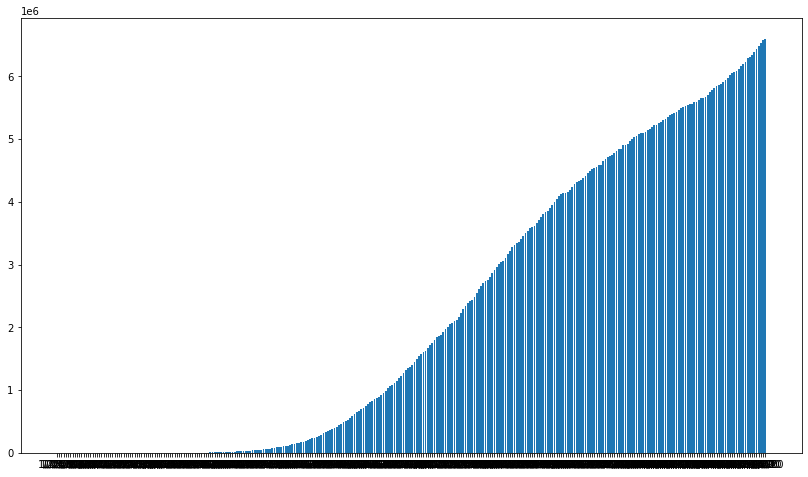

In [11]:
plt.figure(figsize=(14,8))
plt.bar(date, cases)

In [12]:
dados_Brasil = df_pais.loc['Brazil']

In [13]:
dados_Brasil

1/22/20          0
1/23/20          0
1/24/20          0
1/25/20          0
1/26/20          0
            ...   
12/2/20    6436650
12/3/20    6487084
12/4/20    6533968
12/5/20    6577177
12/6/20    6603540
Name: Brazil, Length: 320, dtype: int64

# Eliminando números de caso "0"

In [15]:
dados_Brasil = dados_Brasil[dados_Brasil > 0]
dados_Brasil

2/26/20          1
2/27/20          1
2/28/20          1
2/29/20          2
3/1/20           2
            ...   
12/2/20    6436650
12/3/20    6487084
12/4/20    6533968
12/5/20    6577177
12/6/20    6603540
Name: Brazil, Length: 285, dtype: int64

In [16]:
dados_Brasil.index

Index(['2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20',
       '3/3/20', '3/4/20', '3/5/20', '3/6/20',
       ...
       '11/27/20', '11/28/20', '11/29/20', '11/30/20', '12/1/20', '12/2/20',
       '12/3/20', '12/4/20', '12/5/20', '12/6/20'],
      dtype='object', length=285)

In [17]:
dados_Brasil.values

array([      1,       1,       1,       2,       2,       2,       2,
             4,       4,      13,      13,      20,      25,      31,
            38,      52,     151,     151,     162,     200,     321,
           372,     621,     793,    1021,    1546,    1924,    2247,
          2554,    2985,    3417,    3904,    4256,    4579,    5717,
          6836,    8044,    9056,   10360,   11130,   12161,   14034,
         16170,   18092,   19638,   20727,   22192,   23430,   25262,
         28320,   30425,   33682,   36658,   38654,   40743,   43079,
         45757,   50036,   54043,   59324,   63100,   67446,   73235,
         79685,   87187,   92202,   97100,  101826,  108620,  115455,
        126611,  135773,  146894,  156061,  162699,  169594,  178214,
        190137,  203165,  220291,  233511,  241080,  255368,  271885,
        291579,  310087,  330890,  347398,  363211,  374898,  391222,
        411821,  438238,  465166,  498440,  514849,  526447,  555383,
        584016,  614

Text(0, 0.5, 'Valor em milhões')

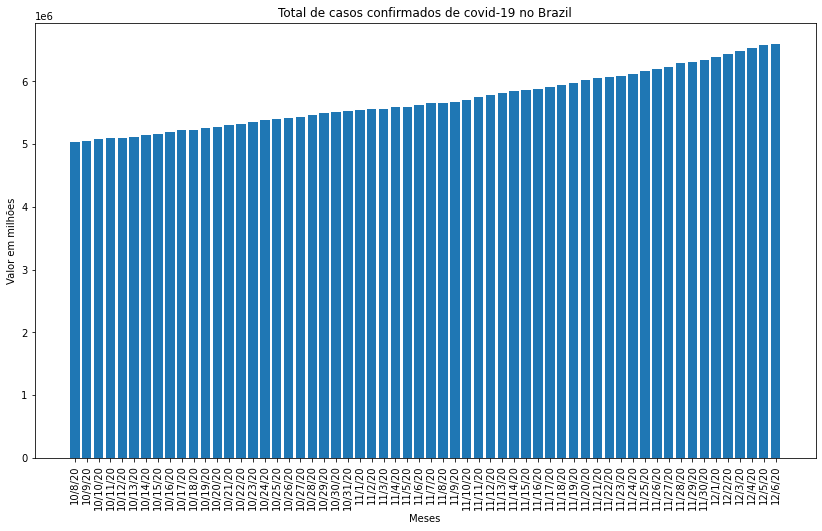

In [44]:
tam = len(dados_Brasil)

plt.figure(figsize=(14,8))
plt.xticks(rotation=90)
plt.bar(dados_Brasil.index[tam-60:tam], dados_Brasil.values[tam-60:tam])
plt.title('Total de casos confirmados de covid-19 no Brazil')
plt.xlabel('Meses')
plt.ylabel('Valor em milhões')

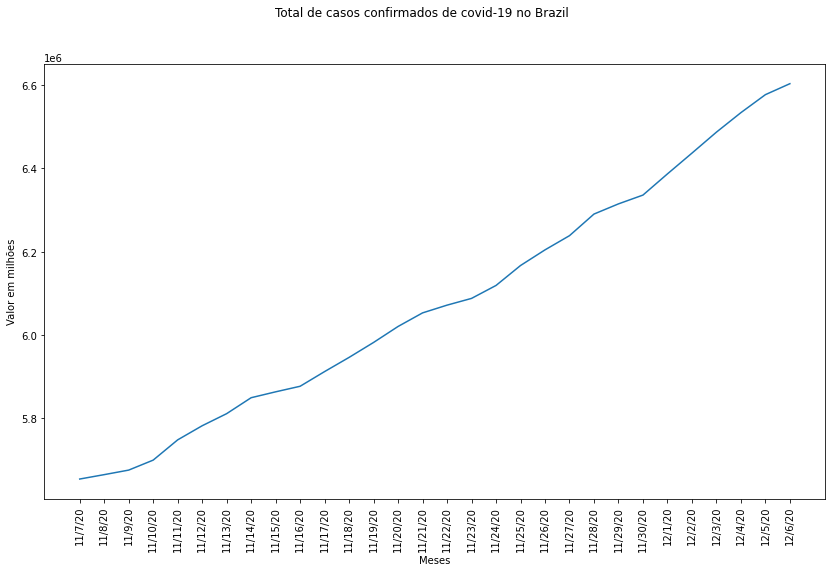

In [45]:
plt.figure(figsize=(14,8))
plt.xticks(rotation=90)
plt.plot(dados_Brasil.index[tam-30:tam], dados_Brasil.values[tam-30:tam])
plt.suptitle('Total de casos confirmados de covid-19 no Brazil')
plt.xlabel('Meses')
plt.ylabel('Valor em milhões')
plt.show()

# Nova analise com o métedo ARIMA
tendencia, sazonalidade e aleatoridade

In [20]:
dados_Brasil_dois = pd.DataFrame(dados_Brasil).rename_axis('data')
dados_Brasil_dois.head()

,Brazil
data,
2/26/20,1
2/27/20,1
2/28/20,1
2/29/20,2
3/1/20,2


In [21]:
dados_Brasil_dois.reset_index(level=0, inplace=True)
dados_Brasil_dois.head()

,data,Brazil
0,2/26/20,1
1,2/27/20,1
2,2/28/20,1
3,2/29/20,2
4,3/1/20,2


In [22]:
print(dados_Brasil_dois.dtypes)

data      object
Brazil     int64
dtype: object


In [23]:
dados_Brasil_dois['data'] = pd.to_datetime(dados_Brasil_dois['data'])
dados_Brasil_dois.head()

,data,Brazil
0,2020-02-26,1
1,2020-02-27,1
2,2020-02-28,1
3,2020-02-29,2
4,2020-03-01,2


In [24]:
print(dados_Brasil_dois.dtypes)

data      datetime64[ns]
Brazil             int64
dtype: object


In [25]:
dados = dados_Brasil_dois.set_index('data')
dados.head()

,Brazil
data,
2020-02-26,1
2020-02-27,1
2020-02-28,1
2020-02-29,2
2020-03-01,2


In [26]:
ts = dados['Brazil']
ts.head()

data
2020-02-26    1
2020-02-27    1
2020-02-28    1
2020-02-29    2
2020-03-01    2
Name: Brazil, dtype: int64

In [27]:
decomposicao = seasonal_decompose(ts)

In [28]:
#tendencia
tendencia = decomposicao.trend
tendencia

data
2020-02-26             NaN
2020-02-27             NaN
2020-02-28             NaN
2020-02-29    1.571429e+00
2020-03-01    2.000000e+00
                  ...     
2020-12-02    6.438898e+06
2020-12-03    6.480155e+06
2020-12-04             NaN
2020-12-05             NaN
2020-12-06             NaN
Name: trend, Length: 285, dtype: float64

In [29]:
#sozonalidade
sazonal = decomposicao.seasonal
sazonal

data
2020-02-26   -2251.780769
2020-02-27    2998.554945
2020-02-28    7203.277473
2020-02-29    9805.312088
2020-03-01     -58.870055
                 ...     
2020-12-02   -2251.780769
2020-12-03    2998.554945
2020-12-04    7203.277473
2020-12-05    9805.312088
2020-12-06     -58.870055
Name: seasonal, Length: 285, dtype: float64

In [30]:
#erro
aleatorio = decomposicao.resid
aleatorio

data
2020-02-26            NaN
2020-02-27            NaN
2020-02-28            NaN
2020-02-29   -9804.883516
2020-03-01      58.870055
                 ...     
2020-12-02       4.066484
2020-12-03    3930.587912
2020-12-04            NaN
2020-12-05            NaN
2020-12-06            NaN
Name: resid, Length: 285, dtype: float64

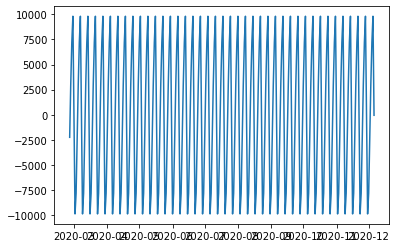

In [31]:
# Visualização de gráfico para cada formato da série temporal
plt.plot(sazonal)

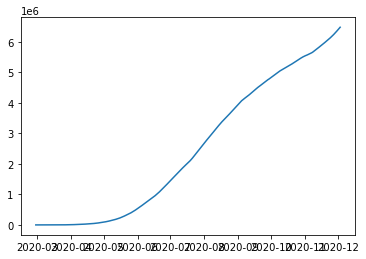

In [32]:
plt.plot(tendencia)

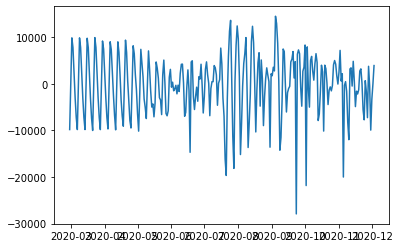

In [33]:
plt.plot(aleatorio)

In [34]:
modelo = ARIMA(ts, order=(2, 1, 2),freq=ts.index.inferred_freq) 
modelo_treinado = modelo.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Brazil   No. Observations:                  284
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3038.057
Method:                       css-mle   S.D. of innovations          10664.931
Date:                Mon, 07 Dec 2020   AIC                           6088.115
Time:                        18:16:17   BIC                           6110.009
Sample:                    02-27-2020   HQIC                          6096.893
                         - 12-06-2020                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.325e+04   1.33e+04      1.743      0.081   -2891.964    4.94e+04
ar.L1.D.Brazil     0.9473      0.201      4.706      0.000       0.553       1.342
ar.L2.D.Brazil     0.0479      0.200      0.239      0.811      -0.345       0.441
ma.L1.D.Brazil    -0.5737      0.190     -3.015      0.003      -0.947      -0.201
ma.L2.D.Brazil    -0.2722      0.161     -1.687      0.092      -0.588       0.044
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0045           +0.0000j            1.0045            0.0000
AR.2          -20.7785           +0.0000j           20.7785            0.5000
MA.1            1.1335           +0.0000j            1.1335            0.0000
MA.2           -3.2410           +0.0000j            3.2410            0.5000
-----------------------------------------------------------------------------
"""

In [35]:
# Previsões de 10 datas no futuro
previsoes = modelo_treinado.forecast(steps = 10)[0]
previsoes

array([6636946.19252319, 6673436.92607752, 6709717.11049032,
       6745945.60835204, 6782115.05379697, 6818226.07971348,
       6854278.93277729, 6890273.87699754, 6926211.17430113,
       6962091.0854728 ])

Text(0, 0.5, 'Valor em milhões')

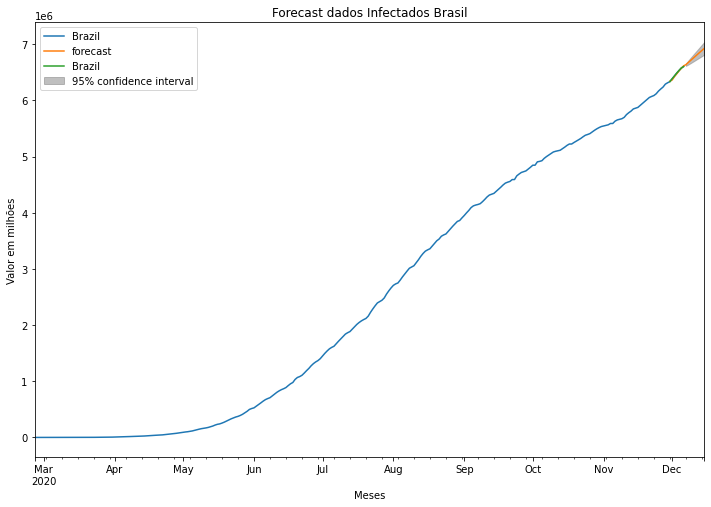

In [39]:
# Criação de eixo para a série temporal completa, com adição das previsões do modelo
#lot_insample = True dados originais
eixo = ts.plot(figsize=(12, 8))
modelo_treinado.plot_predict('2020-11-30', '2020-12-15', ax = eixo, plot_insample = True)
plt.title('Forecast dados Infectados Brasil')
plt.xlabel('Meses')
plt.ylabel('Valor em milhões')

# Nova analise com o métedo auto_ARIMA

In [37]:
modelo_auto = auto_arima(ts, m = 12, seasonal = True, trace = False)
modelo_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  285
Model:             SARIMAX(3, 2, 3)x(2, 0, [1, 2], 12)   Log Likelihood               -2975.395
Date:                                 Mon, 07 Dec 2020   AIC                           5974.791
Time:                                         18:21:13   BIC                           6018.536
Sample:                                              0   HQIC                          5992.331
                                                 - 285                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    681.7621    415.796      1.640      0.101    -133.183    1496.708
ar.L1          0.9977      0.133      7.482      0.000       0.736       1.259
ar.L2         -0.6872      0.161     -4.281      0.000      -1.002      -0.373
ar.L3         -0.2365      0.128     -1.845      0.065      -0.488       0.015
ma.L1         -1.9341      0.119    -16.221      0.000      -2.168      -1.700
ma.L2          1.7456      0.171     10.202      0.000       1.410       2.081
ma.L3         -0.6226      0.108     -5.778      0.000      -0.834      -0.411
ar.S.L12      -0.0781      0.475     -0.165      0.869      -1.008       0.852
ar.S.L24      -0.8827      0.187     -4.727      0.000      -1.249      -0.517
ma.S.L12       0.0172      0.440      0.039      0.969      -0.846       0.880
ma.S.L24       0.9624      0.206      4.662      0.000       0.558       1.367
sigma2      1.109e+08      0.002   7.04e+10      0.000    1.11e+08    1.11e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):               194.37
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):              20.27   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.84e+27. Standard errors may be unstable.
"""

In [41]:
# Visualização dos próximos 10 valores
proximos_10 = modelo_auto.predict(n_periods = 10)
proximos_10 

array([6638658.75278969, 6681998.34552431, 6732608.54035512,
       6784520.77655271, 6833152.15093915, 6876773.18725258,
       6909536.27010279, 6947429.26900968, 6990356.45800485,
       7041923.74079765])

# Reset para exportar dados

In [42]:
df_pais.reset_index()

,Paises,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,45723,45844,46116,46274,46516,46718,46837,46837,47072,47306
1,Albania,0,0,0,0,0,0,0,0,0,...,36245,36790,37625,38182,39014,39719,40501,41302,42148,42988
2,Algeria,0,0,0,0,0,0,0,0,0,...,80168,81212,82221,83199,84152,85084,85927,86730,87502,88252
3,Andorra,0,0,0,0,0,0,0,0,0,...,6610,6610,6712,6745,6790,6842,6904,6955,7005,7050
4,Angola,0,0,0,0,0,0,0,0,0,...,15008,15087,15103,15139,15251,15319,15361,15493,15536,15591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,80429,81890,83585,85647,88004,90192,92708,94676,96098,98038
187,Western Sahara,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
188,Yemen,0,0,0,0,0,0,0,0,0,...,2148,2160,2177,2191,2197,2217,2239,2267,2304,2337
189,Zambia,0,0,0,0,0,0,0,0,0,...,17569,17589,17608,17647,17665,17700,17730,17857,17898,17916


In [43]:
df_pais.to_csv('dadosCovidPaises.csv')